In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def detect_large_black_square(image_path, th_coef=50):
  """
  Detects the large black square in an image, estimates its size, and returns the size and a marked image.

  Args:
    image_path: Path to the image file.

  Returns:
    tuple: A tuple containing:
      - dict: A dictionary containing 'width', 'height', and 'polygon' for the detected black square.
      - image: The image with a bounding polygon drawn around the black square.
  """

  img = cv2.imread(image_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  _, thresh = cv2.threshold(gray, th_coef, 255, cv2.THRESH_BINARY_INV)

  contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  largest_contour = None
  max_area = 0
  for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > max_area:
      max_area = area
      largest_contour = cnt

  if largest_contour is not None:
    x, y, w, h = cv2.boundingRect(largest_contour)
    black_square = {
        "width": w,
        "height": h,
        "polygon": largest_contour
    }
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    return black_square, img
  else:
    return None, img  # Return None if no large square is found

Black square width: 1064, height: 961


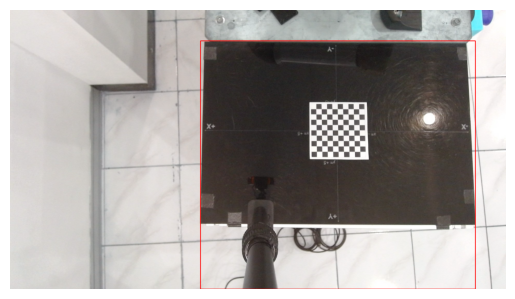

In [5]:
image_path = "meja kosong/WIN_20240404_14_50_48_Pro.jpg"
black_objects, marked_image = detect_large_black_square(image_path, 100)

if black_objects:
  print(f"Black square width: {black_objects['width']}, height: {black_objects['height']}")
  plt.imshow(marked_image)
  plt.axis(False)
  plt.show()
else:
  print("No large black square detected in the image.")

In [24]:
black_objects['polygon']

array([[[704, 334]],

       [[702, 336]],

       [[683, 336]],

       ...,

       [[713, 334]],

       [[712, 335]],

       [[711, 334]]], dtype=int32)

# Another test

# Object detection test

In [7]:
# from transformers import YolosImageProcessor, YolosForObjectDetection
# from PIL import Image
# import torch
# import requests

In [8]:
# image = Image.open("/mnt/c/Others/V2/meja kosong/WIN_20240404_14_50_48_Pro.jpg")

In [9]:
# model = YolosForObjectDetection.from_pretrained('hustvl/yolos-tiny')
# image_processor = YolosImageProcessor.from_pretrained("hustvl/yolos-tiny")

In [10]:
# inputs = image_processor(images=image, return_tensors="pt")
# outputs = model(**inputs)

# # model predicts bounding boxes and corresponding COCO classes
# logits = outputs.logits
# bboxes = outputs.pred_boxes


# # print results
# target_sizes = torch.tensor([image.size[::-1]])
# results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]
# for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
#     box = [round(i, 2) for i in box.tolist()]
#     print(
#         f"Detected {model.config.id2label[label.item()]} with confidence "
#         f"{round(score.item(), 3)} at location {box}"
#     )